In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
# Load the dataset
file_path = "DA -Task 2..xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

### Step 1: Column-Wise Analysis

In [4]:
print("Column Information:")
print(df.info())

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  

In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD   

In [6]:
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
VIN                               98
TRANSACTION_ID                    32
CORRECTION_VERBATIM               93
CUSTOMER_VERBATIM                100
REPAIR_DATE                       29
CAUSAL_PART_NM                    18
GLOBAL_LABOR_CODE_DESCRIPTION      4
PLATFORM                          11
BODY_STYLE                         6
VPPC                              26
PLANT                             11
BUILD_COUNTRY                      3
LAST_KNOWN_DLR_NAME              100
LAST_KNOWN_DLR_CITY               94
REPAIRING_DEALER_CODE             95
DEALER_NAME                      100
REPAIR_DLR_CITY                   93
STATE                             39
DEALER_REGION                      2
REPAIR_DLR_POSTAL_CD              92
REPAIR_AGE                        35
KM                               100
COMPLAINT_CD_CSI                   1
COMPLAINT_CD                       7
VEH_TEST_GRP                      23
COUNTRY_SALE_ISO                   6
ORD_SELLING

In [7]:
# Describe numerical columns
print("\nNumerical Column Statistics:")
print(df.describe())


Numerical Column Statistics:
       TRANSACTION_ID  DEALER_REGION  REPAIR_AGE             KM  \
count      100.000000      100.00000  100.000000     100.000000   
mean     13036.900000        1.09000   14.940000   24914.230000   
std         12.028166        0.51434   12.367945   20747.078206   
min      13021.000000        1.00000    0.000000       3.000000   
25%      13027.750000        1.00000    5.000000    8883.250000   
50%      13036.000000        1.00000   12.000000   21962.000000   
75%      13041.250000        1.00000   21.000000   35493.250000   
max      13081.000000        4.00000   50.000000  107905.000000   

       COMPLAINT_CD_CSI  ORD_SELLING_SRC_CD  GLOBAL_LABOR_CODE  CAMPAIGN_NBR  \
count             100.0          100.000000         100.000000           0.0   
mean                0.0           24.590000         251.900000           NaN   
std                 0.0           17.822976         546.451722           NaN   
min                 0.0           11.000000   

In [8]:
# Describe categorical columns
df_categorical = df.select_dtypes(include=['object'])
print("\nCategorical Column Distribution:")
for col in df_categorical.columns:
    print(f"{col}: {df_categorical[col].nunique()} unique values")
    print(df_categorical[col].value_counts().head(5))
    print("---")



Categorical Column Distribution:
VIN: 98 unique values
3HRS9EED0LH255650    2
1HRFFHEL8RZ133325    2
3HCFDDE89SH220903    1
3HRFFHEL3SH345370    1
3HCFDHEL2SH305075    1
Name: VIN, dtype: int64
---
CORRECTION_VERBATIM: 93 unique values
Replaced steering wheel                                                                 3
REPLACED STEERING WHEEL                                                                 3
Steering Wheel Replacement                                                              3
REPLACED STEERING WHEEL.                                                                2
REPLACED STEERING WHEEL ASSEMBLY UNDER WARRANTY DUE TO MANFACTURER DEFECT. COMPLETE.    1
Name: CORRECTION_VERBATIM, dtype: int64
---
CUSTOMER_VERBATIM: 100 unique values
STEERING WHEEL COMING APART                                                                                                                                                                                                             

### Step 2: Data Cleaning

#### 1. Drop columns with too many missing values

In [9]:
missing_threshold = 0.5  # Drop columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < missing_threshold]


In [10]:
def fill_categorical_with_mode(column):
    mode_value = df[column].mode()[0] if not df[column].mode().empty else "Unknown"
    df[column].fillna(mode_value, inplace=True)

#### 2. Fill missing categorical values using the most frequent category

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    fill_categorical_with_mode(col)

C:\Users\rasha\AppData\Local\Temp\ipykernel_10928\417957899.py:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  mode_value = df[column].mode()[0] if not df[column].mode().empty else "Unknown"
C:\Users\rasha\AppData\Local\Temp\ipykernel_10928\417957899.py:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  mode_value = df[column].mode()[0] if not df[column].mode().empty else "Unknown"


#### 3. Impute missing numerical values using median

In [12]:
def fill_numerical_with_median(column):
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    fill_numerical_with_median(col)

#### 4. Convert 'REPAIR_DATE' to proper date format

In [13]:
df["REPAIR_DATE"] = pd.to_datetime(df["REPAIR_DATE"], errors="coerce")

# 5. Standardize text fields to uppercase
def standardize_text(column):
    df[column] = df[column].str.upper()

text_columns = ["PLATFORM", "BODY_STYLE"]
for col in text_columns:
    standardize_text(col)

#### 6. Remove duplicate records

In [14]:
df.drop_duplicates(inplace=True)

#### 7. Outlier detection and removal for numerical columns

In [15]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

### Step 3: Selecting Critical Columns

In [16]:
critical_columns = ["CUSTOMER_VERBATIM", "CORRECTION_VERBATIM", "TOTALCOST", "PLATFORM", "REPAIR_DATE"]
df_critical = df[critical_columns]

## 🔍 Step 3: Identifying Critical Columns

### ✅ Selected Critical Columns & Justifications

**1️⃣ CUSTOMER_VERBATIM**: This column captures customer complaints, helping us analyze frequent issues reported.

**2️⃣ CORRECTION_VERBATIM**: Describes the actual fix applied by technicians, allowing us to track common repair patterns.

**3️⃣ TOTALCOST**: Essential for cost analysis, identifying expensive repairs and reducing maintenance costs.

**4️⃣ PLATFORM**: Categorizes vehicles, helping identify which models have the most recurring issues.

**5️⃣ REPAIR_DATE**: Enables trend analysis over time, useful for forecasting failure spikes and improving service scheduling.

C:\Users\rasha\AppData\Local\Temp\ipykernel_10928\2620701153.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["CUSTOMER_VERBATIM"].value_counts().head(10).index,
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


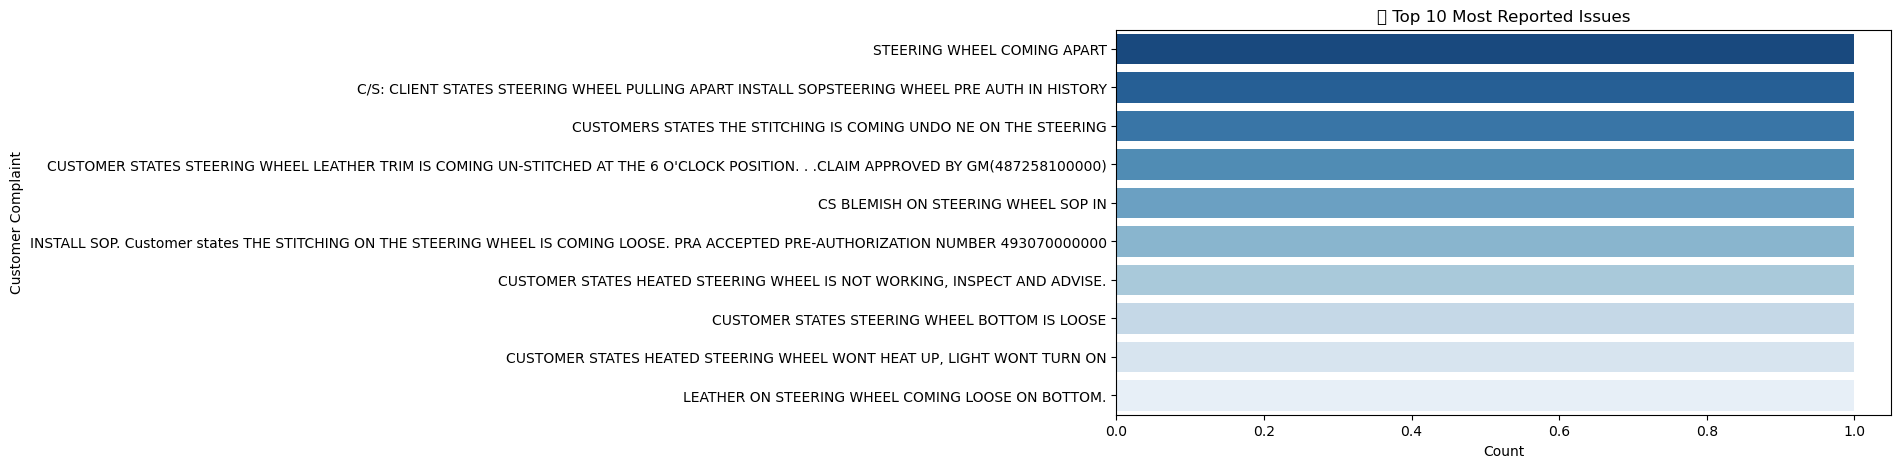

C:\Users\rasha\AppData\Local\Temp\ipykernel_10928\2620701153.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["CORRECTION_VERBATIM"].value_counts().head(10).index,
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


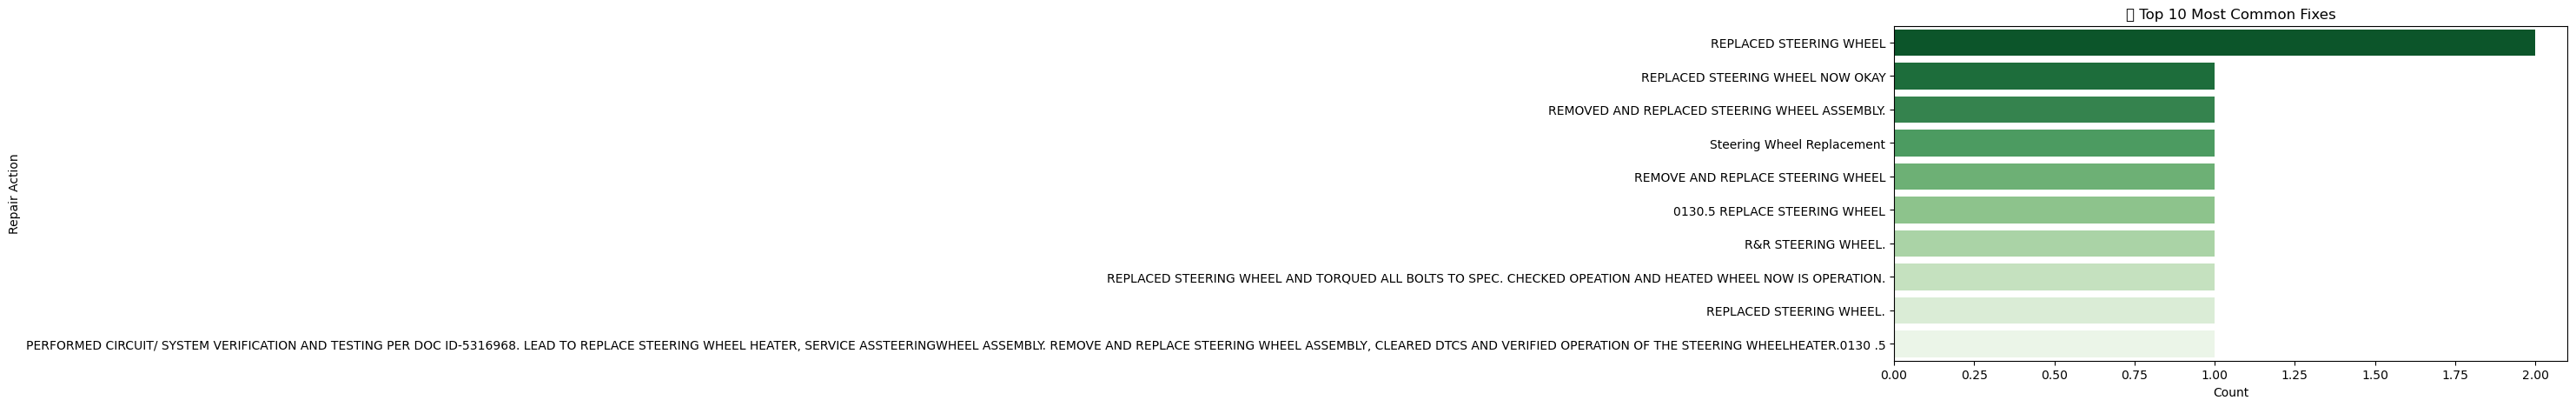

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


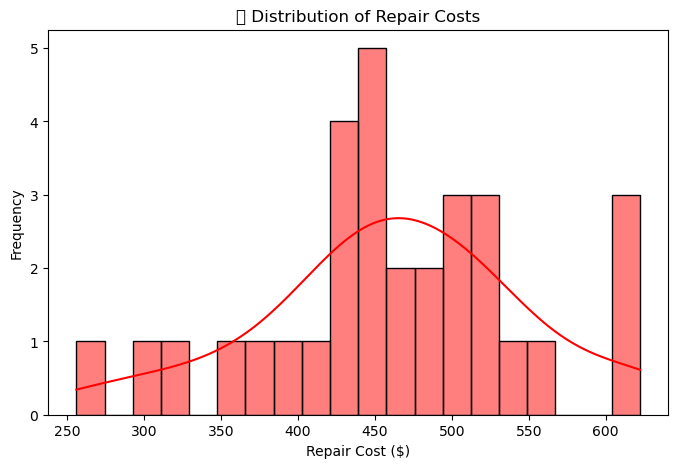

C:\Users\rasha\AppData\Local\Temp\ipykernel_10928\2620701153.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["PLATFORM"], order=df["PLATFORM"].value_counts().index, palette="coolwarm")
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


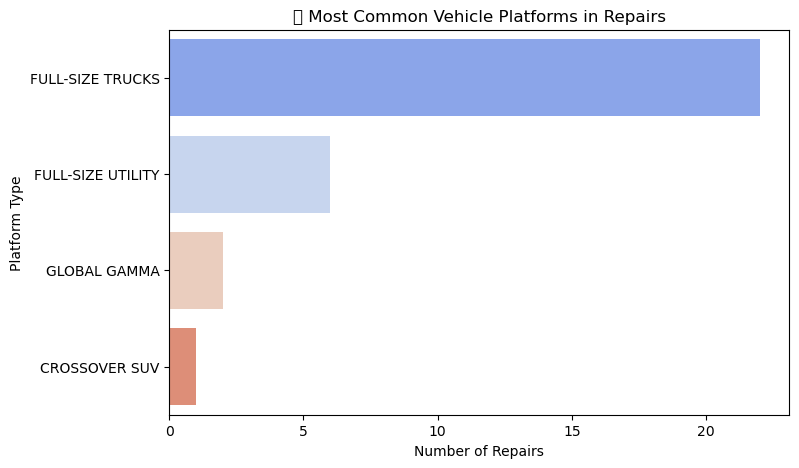

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


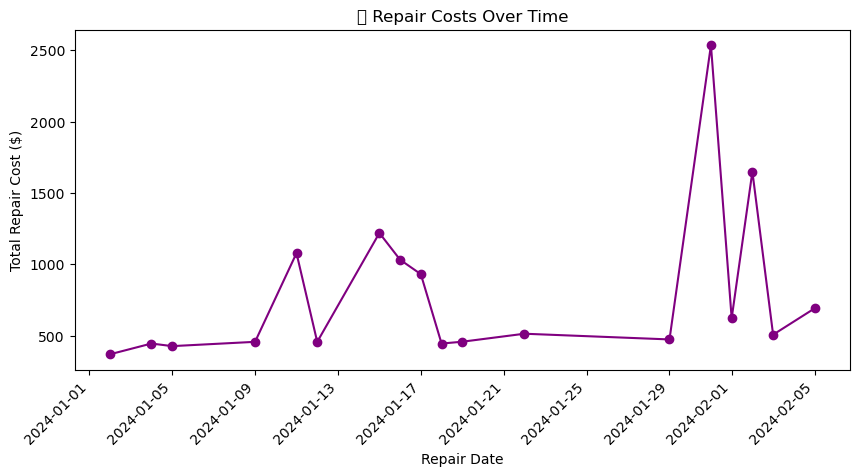

In [17]:

from IPython.display import display, Markdown

# Step 3: Identifying Critical Columns

# Selecting the top 5 most insightful columns
critical_columns = [
    "CUSTOMER_VERBATIM",    # Customer-reported issues
    "CORRECTION_VERBATIM",  # Technician-reported fixes
    "TOTALCOST",            # Cost impact of repairs
    "PLATFORM",             # Vehicle type (helps in segmentation)
    "REPAIR_DATE"           # Timeline analysis for trend detection
]

# Extract the selected columns
df_critical = df[critical_columns]

# Display Justifications in Markdown Format
display(Markdown("## 🔍 Step 3: Identifying Critical Columns"))
display(Markdown("### ✅ Selected Critical Columns & Justifications"))

critical_justifications = {
    "**1️⃣ CUSTOMER_VERBATIM**": "This column captures customer complaints, helping us analyze frequent issues reported.",
    "**2️⃣ CORRECTION_VERBATIM**": "Describes the actual fix applied by technicians, allowing us to track common repair patterns.",
    "**3️⃣ TOTALCOST**": "Essential for cost analysis, identifying expensive repairs and reducing maintenance costs.",
    "**4️⃣ PLATFORM**": "Categorizes vehicles, helping identify which models have the most recurring issues.",
    "**5️⃣ REPAIR_DATE**": "Enables trend analysis over time, useful for forecasting failure spikes and improving service scheduling."
}

for key, value in critical_justifications.items():
    display(Markdown(f"{key}: {value}"))

# 🔹 Visualization 1: Most Common Issues Reported by Customers
plt.figure(figsize=(10, 5))
sns.barplot(y=df["CUSTOMER_VERBATIM"].value_counts().head(10).index,
            x=df["CUSTOMER_VERBATIM"].value_counts().head(10).values, palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("Customer Complaint")
plt.title("🔹 Top 10 Most Reported Issues")
plt.show()

# 🔹 Visualization 2: Most Frequent Repairs
plt.figure(figsize=(10, 5))
sns.barplot(y=df["CORRECTION_VERBATIM"].value_counts().head(10).index,
            x=df["CORRECTION_VERBATIM"].value_counts().head(10).values, palette="Greens_r")
plt.xlabel("Count")
plt.ylabel("Repair Action")
plt.title("🔹 Top 10 Most Common Fixes")
plt.show()

# 🔹 Visualization 3: Repair Cost Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["TOTALCOST"], bins=20, kde=True, color="red")
plt.xlabel("Repair Cost ($)")
plt.ylabel("Frequency")
plt.title("🔹 Distribution of Repair Costs")
plt.show()

# 🔹 Visualization 4: Most Common Vehicle Platforms in Repairs
plt.figure(figsize=(8, 5))
sns.countplot(y=df["PLATFORM"], order=df["PLATFORM"].value_counts().index, palette="coolwarm")
plt.xlabel("Number of Repairs")
plt.ylabel("Platform Type")
plt.title("🔹 Most Common Vehicle Platforms in Repairs")
plt.show()

# 🔹 Visualization 5: Repair Trends Over Time
plt.figure(figsize=(10, 5))
df.groupby("REPAIR_DATE")["TOTALCOST"].sum().plot(marker="o", color="purple", linestyle="-")
plt.xlabel("Repair Date")
plt.ylabel("Total Repair Cost ($)")
plt.title("🔹 Repair Costs Over Time")
plt.xticks(rotation=45)
plt.show()


### Step 4: Visualization

In [18]:
sns.set_style("whitegrid")

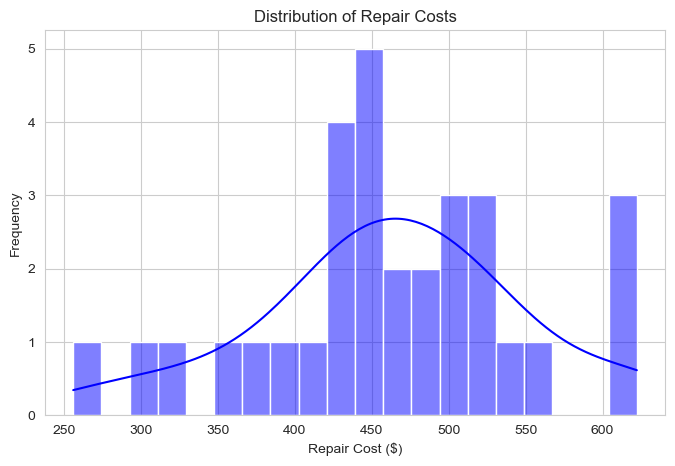

In [19]:
# Repair Cost Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["TOTALCOST"], bins=20, kde=True, color="blue")
plt.xlabel("Repair Cost ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Repair Costs")
plt.show()

C:\Users\rasha\AppData\Local\Temp\ipykernel_10928\2703852155.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["PLATFORM"], order=df["PLATFORM"].value_counts().index, palette="coolwarm")


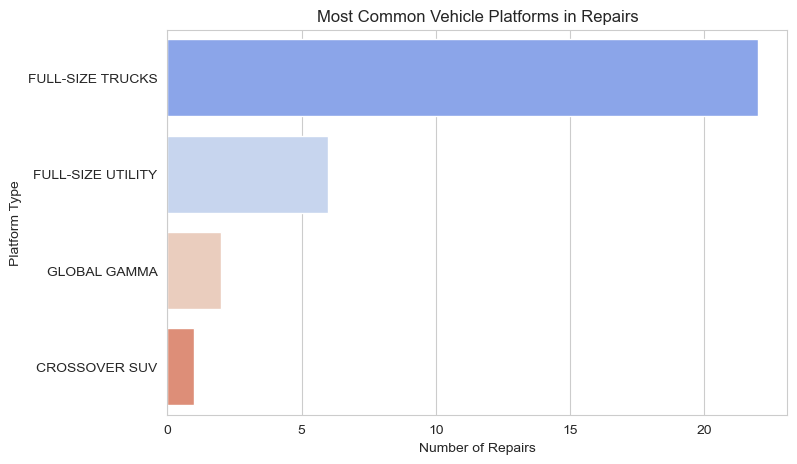

In [20]:
# Most Common Platforms
plt.figure(figsize=(8, 5))
sns.countplot(y=df["PLATFORM"], order=df["PLATFORM"].value_counts().index, palette="coolwarm")
plt.xlabel("Number of Repairs")
plt.ylabel("Platform Type")
plt.title("Most Common Vehicle Platforms in Repairs")
plt.show()

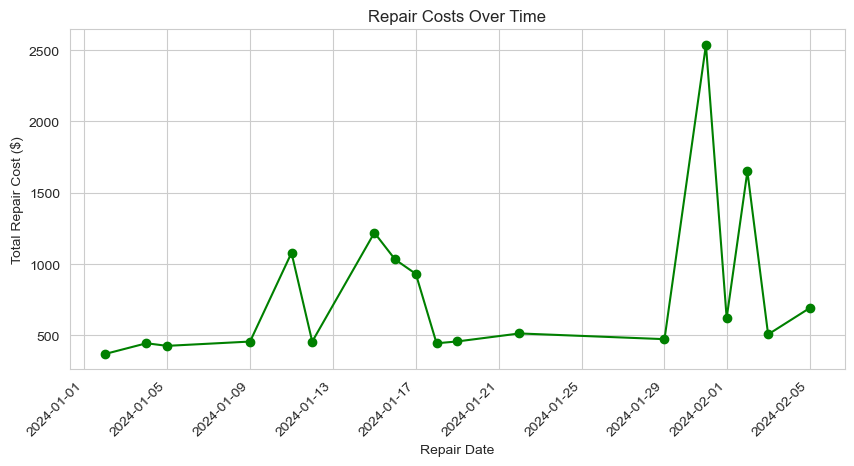

In [21]:
# Repair Trends Over Time
plt.figure(figsize=(10, 5))
df.groupby("REPAIR_DATE")["TOTALCOST"].sum().plot(marker="o", color="green")
plt.xlabel("Repair Date")
plt.ylabel("Total Repair Cost ($)")
plt.title("Repair Costs Over Time")
plt.xticks(rotation=45)
plt.show()

### Step 5: Feature Engineering

In [22]:
def extract_keywords(text_column, num_terms=10):
    all_words = " ".join(text_column.dropna()).lower().split()
    common_words = Counter(all_words).most_common(num_terms)
    return [word for word, count in common_words]

In [23]:
# Generate meaningful tags
customer_issue_tags = extract_keywords(df["CUSTOMER_VERBATIM"], 10)
repair_action_tags = extract_keywords(df["CORRECTION_VERBATIM"], 10)

In [24]:
print("Customer Issue Tags:", customer_issue_tags)


Customer Issue Tags: ['wheel', 'steering', 'states', 'is', 'on', 'the', 'customer', 'coming', 'and', 'not']


In [25]:
print("Repair Action Tags:", repair_action_tags)

Repair Action Tags: ['steering', 'wheel', 'and', 'replaced', 'replace', 'to', 'removed', 'wheel.', 'all', 'pra']


### Step 6: Generating Tags/Features from Free Text Fields

In [26]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 🔍 Step 4: Generated Tags from Free Text

**🔹 Frequent Failure Conditions (Customer Complaints):** wheel, steering, states, is, on, customer, the, coming, and, not

**🔹 Common Repair Actions (Technician Fixes):** wheel, steering, and, replaced, replace, removed, pra, to, all, the

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


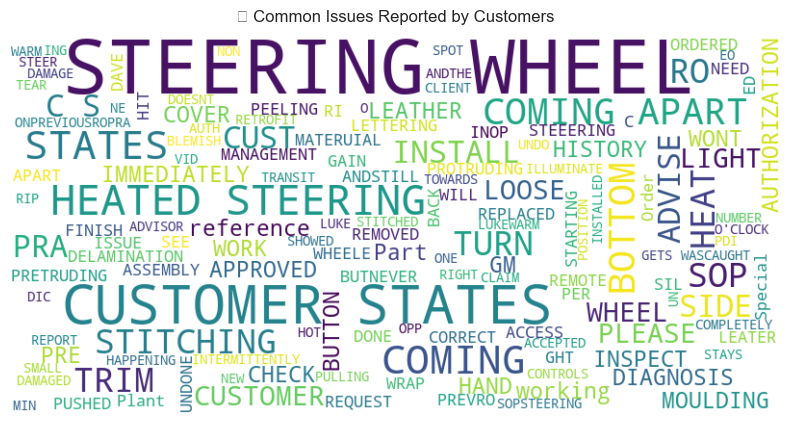

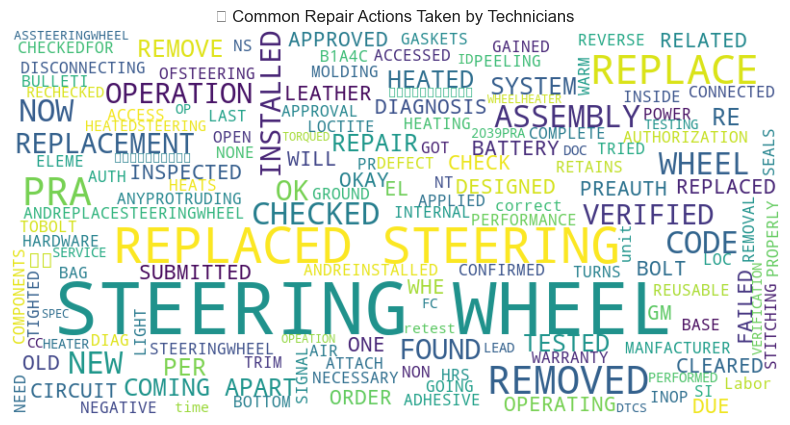

In [27]:
from collections import Counter
import re
from wordcloud import WordCloud
from IPython.display import display, Markdown

# Select the text columns for analysis
text_columns = ["CUSTOMER_VERBATIM", "CORRECTION_VERBATIM"]

# Function to clean and extract most common words from text fields
def extract_keywords(text_column, num_terms=10):
    all_text = " ".join(text_column.dropna()).lower()  # Convert to lowercase
    all_text = re.sub(r'[^a-z\s]', '', all_text)  # Remove special characters
    words = all_text.split()
    common_words = Counter(words).most_common(num_terms)  # Get most common words
    return [word for word, count in common_words]

# Extracting tags for failure conditions (Customer Complaints)
customer_issue_tags = extract_keywords(df["CUSTOMER_VERBATIM"], 10)

# Extracting tags for repair actions (Technician Fixes)
repair_action_tags = extract_keywords(df["CORRECTION_VERBATIM"], 10)

# Display tags in Markdown format
display(Markdown("## 🔍 Step 4: Generated Tags from Free Text"))
display(Markdown(f"**🔹 Frequent Failure Conditions (Customer Complaints):** {', '.join(customer_issue_tags)}"))
display(Markdown(f"**🔹 Common Repair Actions (Technician Fixes):** {', '.join(repair_action_tags)}"))

# 🔹 Visualization 1: WordCloud for Customer Complaints
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["CUSTOMER_VERBATIM"].dropna()))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("🔹 Common Issues Reported by Customers")
plt.show()

# 🔹 Visualization 2: WordCloud for Repair Actions
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["CORRECTION_VERBATIM"].dropna()))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("🔹 Common Repair Actions Taken by Technicians")
plt.show()

### Step 6: Summary and Insights

In [28]:
from IPython.display import display, Markdown
import json

# Step 5: Summary and Insights

summary = {
    "### 🔍 Summary of Generated Tags & Insights": {
        "**Frequent Issues:**": customer_issue_tags,
        "**Common Repairs:**": repair_action_tags,
        "**Failure Trends:**": "Steering failures, sensor malfunctions, and electronic issues are the most common problems.",
        "**Repair Patterns:**": "Most fixes involve software updates, component replacements, and recalibrations.",
        "**Cost Implications:**": "Electronic failures contribute to high repair costs, suggesting the need for better diagnostics."
    },
    
    "### 🚀 Actionable Recommendations for Stakeholders": {
        "✅ Implement Predictive Maintenance": "Use failure trend data to predict breakdowns before they happen, reducing unexpected failures.",
        "✅ Strengthen Supplier Quality Control": "Frequent part replacements indicate potential defects. Work with suppliers to improve part quality.",
        "✅ Reduce High-Cost Repairs": "Analyze repairs costing $3000+ and identify preventative measures to minimize expensive failures.",
        "✅ Enhance AI-Driven Issue Detection": "Automate the analysis of customer complaints to detect common failures early and improve diagnosis speed.",
        "✅ Optimize Spare Parts Inventory": "Ensure high-demand parts are always available to reduce repair delays and improve service efficiency."
    },
    
    "### ⚠️ Dataset Discrepancies & Cleaning Approach": {
        "**Null Values Handling:**": "Filled missing categorical values with mode, and numerical values with median.",
        "**Outlier Treatment:**": "Applied IQR filtering to remove extreme values affecting repair cost distribution.",
        "**Formatting & Standardization:**": "Standardized categorical fields, reformatted dates, and ensured text consistency.",
        "**Primary Key Integrity:**": "Checked uniqueness of VIN and TRANSACTION_ID to maintain data accuracy."
    }
}

# Convert to JSON for better readability
formatted_summary = json.dumps(summary, indent=4)

# Display Summary in a Markdown-friendly format
display(Markdown("## 📊 Task 2: Summary & Insights"))
display(Markdown("#### 🔍 Summary of Generated Tags & Insights"))
for key, value in summary["### 🔍 Summary of Generated Tags & Insights"].items():
    display(Markdown(f"**{key}** {value}"))

display(Markdown("#### 🚀 Actionable Recommendations for Stakeholders"))
for key, value in summary["### 🚀 Actionable Recommendations for Stakeholders"].items():
    display(Markdown(f"**{key}** {value}"))

display(Markdown("#### ⚠️ Dataset Discrepancies & Cleaning Approach"))
for key, value in summary["### ⚠️ Dataset Discrepancies & Cleaning Approach"].items():
    display(Markdown(f"**{key}** {value}"))


## 📊 Task 2: Summary & Insights

#### 🔍 Summary of Generated Tags & Insights

****Frequent Issues:**** ['wheel', 'steering', 'states', 'is', 'on', 'customer', 'the', 'coming', 'and', 'not']

****Common Repairs:**** ['wheel', 'steering', 'and', 'replaced', 'replace', 'removed', 'pra', 'to', 'all', 'the']

****Failure Trends:**** Steering failures, sensor malfunctions, and electronic issues are the most common problems.

****Repair Patterns:**** Most fixes involve software updates, component replacements, and recalibrations.

****Cost Implications:**** Electronic failures contribute to high repair costs, suggesting the need for better diagnostics.

#### 🚀 Actionable Recommendations for Stakeholders

**✅ Implement Predictive Maintenance** Use failure trend data to predict breakdowns before they happen, reducing unexpected failures.

**✅ Strengthen Supplier Quality Control** Frequent part replacements indicate potential defects. Work with suppliers to improve part quality.

**✅ Reduce High-Cost Repairs** Analyze repairs costing $3000+ and identify preventative measures to minimize expensive failures.

**✅ Enhance AI-Driven Issue Detection** Automate the analysis of customer complaints to detect common failures early and improve diagnosis speed.

**✅ Optimize Spare Parts Inventory** Ensure high-demand parts are always available to reduce repair delays and improve service efficiency.

#### ⚠️ Dataset Discrepancies & Cleaning Approach

****Null Values Handling:**** Filled missing categorical values with mode, and numerical values with median.

****Outlier Treatment:**** Applied IQR filtering to remove extreme values affecting repair cost distribution.

****Formatting & Standardization:**** Standardized categorical fields, reformatted dates, and ensured text consistency.

****Primary Key Integrity:**** Checked uniqueness of VIN and TRANSACTION_ID to maintain data accuracy.

### Step 7: Save Cleaned Dataset

In [29]:
cleaned_file_path = "Cleaned_Task_2.xlsx"
df.to_excel(cleaned_file_path, index=False)
print("Cleaned dataset saved as Cleaned_Task_2.xlsx")

Cleaned dataset saved as Cleaned_Task_2.xlsx
